# Prueba Técnica - Talento B
# Sobre TRM USD-COP
# EDA

### Santiago Galvis Duque

In [1]:
# Importando Librerias

# Para analisis de datos
import numpy as np 
import pandas as pd

# Para graficos
import matplotlib.pyplot as plt
import seaborn as sns

### Cargando Dataset desde carpeta Data

In [2]:
# Cargando el Dataframe con los datos de la tasa de cambio
df = pd.read_csv('../../Data/Tasa_de_Cambio_Representativa_del__Mercado_-Historico.csv')
df = df.iloc[:1000] # Seleccionando solo las últimas 1000 filas
df.head() # Visualizar el Dataframe recién cargado

,VALOR,UNIDAD,VIGENCIADESDE,VIGENCIAHASTA
0,4418.58,COP,23/11/2024,25/11/2024
1,4387.09,COP,22/11/2024,22/11/2024
2,4414.06,COP,21/11/2024,21/11/2024
3,4401.34,COP,20/11/2024,20/11/2024
4,4400.69,COP,19/11/2024,19/11/2024


In [3]:
# Veamos un resumen de la información del Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   VALOR          1000 non-null   float64
 1   UNIDAD         1000 non-null   object 
 2   VIGENCIADESDE  1000 non-null   object 
 3   VIGENCIAHASTA  1000 non-null   object 
dtypes: float64(1), object(3)
memory usage: 31.4+ KB


Como se puede observar, el Dataset no tiene ningún dato faltante. Ahora revisemos el comportamiento de las variables categóricas

In [ ]:
# Veamos qué tipo de datos tiene la columna 'UNIDAD'
df['UNIDAD'].value_counts()

COP    1000
Name: UNIDAD, dtype: int64

In [6]:
# Contemos cuantos valores únicos hay en la columna 'VIGENCIADESDE'
(df['VIGENCIADESDE'].value_counts() != 1).sum()

0

In [7]:
# Contemos cuantos valores únicos hay en la columna 'VIGENCIAHASTA'
(df['VIGENCIAHASTA'].value_counts() != 1).sum()

0

In [142]:
Fecha_min = df.loc[len(df)-1,'VIGENCIADESDE']
Fecha_max = df.loc[0,'VIGENCIAHASTA']
print('Fecha mínima:',Fecha_min)
print('Fecha máxima:',Fecha_max)

Fecha mínima: 05/09/2020
Fecha máxima: 25/11/2024


Como es de esperarse, los valores de la columna 'VALOR' están todos en Pesos Colombianos. Además, ninguna fecha se repite en 'VIGENCIADESDE' o 'VIGENCIAHASTA'. El Dataset está comprendido desde el 5 de Septiembre del 2020 hasta el 25 de Noviembre del 2024.
Continuamos analizando el comportamiento de la única variable numérica del Dataset:

In [8]:
# Veamos un resumen estadístico de los datos
df['VALOR'].describe()

count    1000.000000
mean     4060.558590
std       362.289992
min      3410.820000
25%      3820.527500
50%      3963.645000
75%      4240.707500
max      5061.210000
Name: VALOR, dtype: float64

Ahora, continuemos revisando el comportamiento de la tasa de cambio a través de algunas visualizaciones que nos ayuden a comprender su evolución temporal.

In [94]:
# Creando variables auxiliares para visualizar los datos
df['Fecha'] = pd.to_datetime(df['VIGENCIADESDE'], format='%d/%m/%Y') # Columna de fecha en formato datetime
df['Año'] = df['Fecha'].dt.year # Columna de año
Meses = df['Fecha'].dt.to_period('M').unique() # Lista de meses

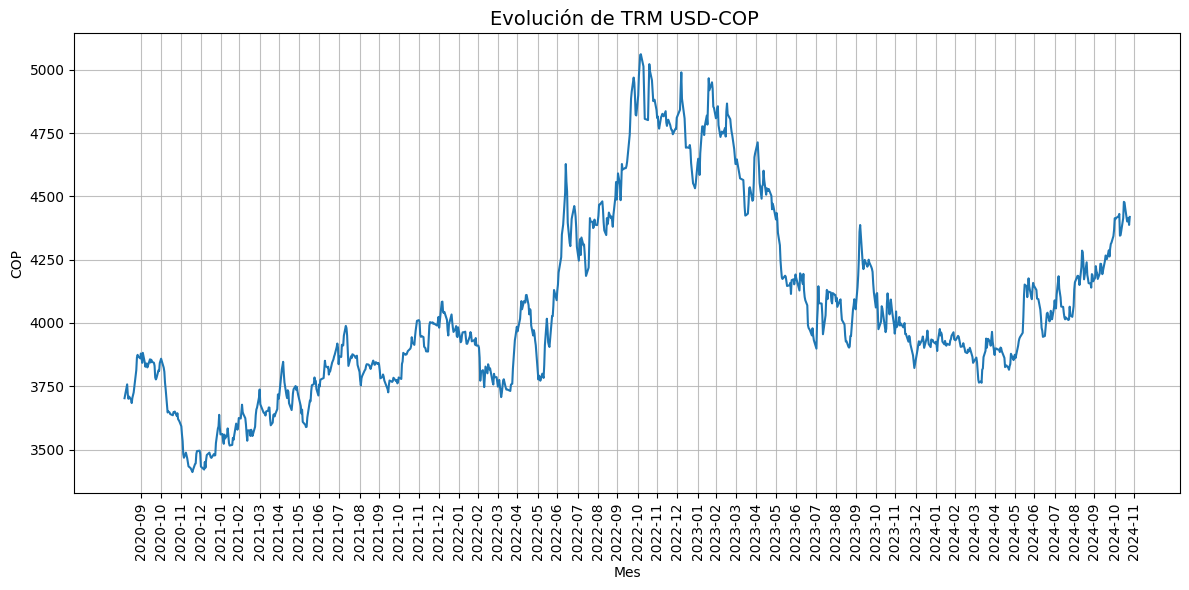

In [129]:
# Creadno el gráfico de la tasa de cambio contra el tiempo
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x ='Fecha', y = 'VALOR', data = df)

# Personalizando el gráfico
ax.set_title('Evolución de TRM USD-COP ', fontsize=14)
ax.set_xlabel('Mes', fontsize=10)
ax.set_ylabel('COP', fontsize=10)
ax.set_xticks(df['Fecha'].dt.to_period('M').unique())
ax.set_xticklabels(Meses.astype(str), rotation=90)
ax.grid(alpha=0.8)
plt.tight_layout()
plt.show()

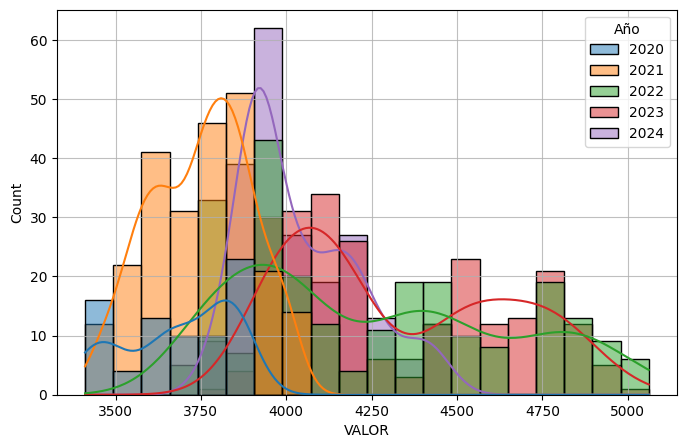

In [127]:
# Creando un Histograma de la tasa de cambio
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(data=df, x='VALOR', hue='Año', kde = True, ax=ax, palette='tab10')

# Personalizando el gráfico
ax.set_title('Histograma de TRM USD-COP ', fontsize=14)
ax.set_ylabel('COP', fontsize=10)
ax.grid(alpha=0.8)
plt.tight_layout()
plt.show()

Los dos anteriores gráficos nos permiten visualizar algunos insights que pueden ser de utilidad en posteriores análisis.
Veamos que en el máximo del histograma se encuentra en el año 2024 para un valor cercano a 4000 COP y en general para este mismo año se están presentando valores que no se repetían desde 2022. Adicional, se puede observar que el área más pequeño es para el año 2020, esto es debido a que el dataset solo tiene datos desde el 5 de Sep del 2020.

Por último analicemos el comportamiento estadístico de la tasa de cambio.

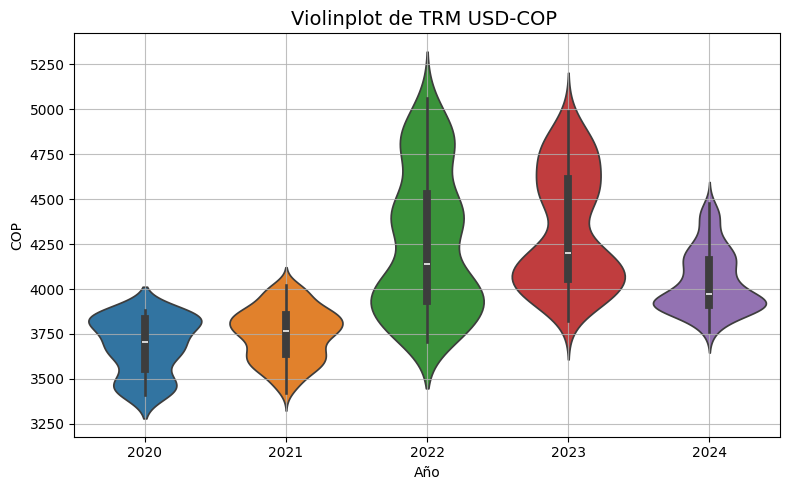

In [170]:
# Creando un gráfico de violin
fig, ax = plt.subplots(figsize=(8, 5))
sns.violinplot(data=df, y='VALOR',x='Año', hue='Año', ax=ax,palette='tab10', legend=False)

# Personalizando el gráfico
ax.set_title('Violinplot de TRM USD-COP ', fontsize=14)
ax.set_xlabel('Año', fontsize=10)
ax.set_ylabel('COP', fontsize=10)
ax.grid(alpha=0.8)
plt.tight_layout()
plt.show()

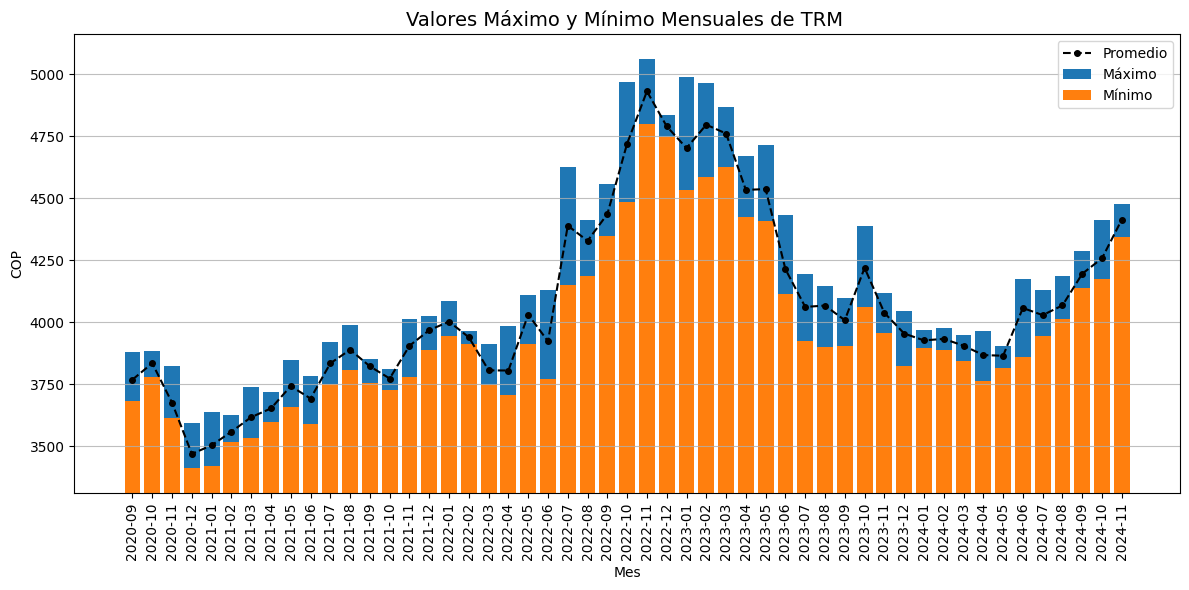

In [171]:
# Calcular valores máximo y mínimo mensuales
Max_Min_Mes = df.groupby(df['Fecha'].dt.to_period('M'))['VALOR'].agg(['max', 'min']).reset_index()
Promedio = df.groupby(df['Fecha'].dt.to_period('M'))['VALOR'].mean().reset_index()

# Crear gráfico de columnas
fig, ax = plt.subplots(figsize=(12, 6))
x = range(len(Max_Min_Mes))

ax.bar(x, Max_Min_Mes['max'], label='Máximo')
ax.bar(x, Max_Min_Mes['min'], label='Mínimo')
ax.plot(x, Promedio['VALOR'], color='black', marker='o',markersize = 4, linestyle='--',label = 'Promedio')

ax.set_ylim(Max_Min_Mes['min'].min() - 100, Max_Min_Mes['max'].max() + 100)  # Acercamiento

# Personalizando el gráfico
ax.set_title('Valores Máximo y Mínimo Mensuales de TRM ', fontsize=14)
ax.set_xlabel('Mes',fontsize=10)
ax.set_ylabel('COP',fontsize=10)
ax.set_xticks(x)
ax.set_xticklabels(Max_Min_Mes['Fecha'].astype(str), rotation=90)
ax.legend()
ax.grid(axis='y', alpha=0.8)

plt.tight_layout()
plt.show()

Estos dos últimos plots nos hablan de las fluctuaciones que tuvo la tasa de cambio para un mismo año y el rango en el cual se mantuvo mes a mes. 

Por tanto, frente a nosotros se encuentra un pequeño dataset con el cual se puede estudiar la tasa de cambio USD-COP desde Septiembre del 2020 hasta el día presente. Contiene información completa, sin duplicados o datos atípicos del valor de tasa de cambio, la misma moneda para todos los datos y el intervalo de tiempo en el que es válida dicha tasa. Mediante visualizaciones se puede identificar diferentes comportamientos en el periodo de tiempo abarcado. Con esto se daría paso a un análisis completo para determinar posibles detonantes, comportamientos atípicos y la construcción de modelos predictivos según lo requiera el problema a tratar.
